In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [15]:
# 1. Generate Sample Dataset
X, y = make_blobs(n_samples=300, centers=3, n_features=4, random_state=42)
print("Dataset shape:", X.shape)

Dataset shape: (300, 4)


In [16]:
# 2. Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
import warnings

warnings.filterwarnings('ignore')

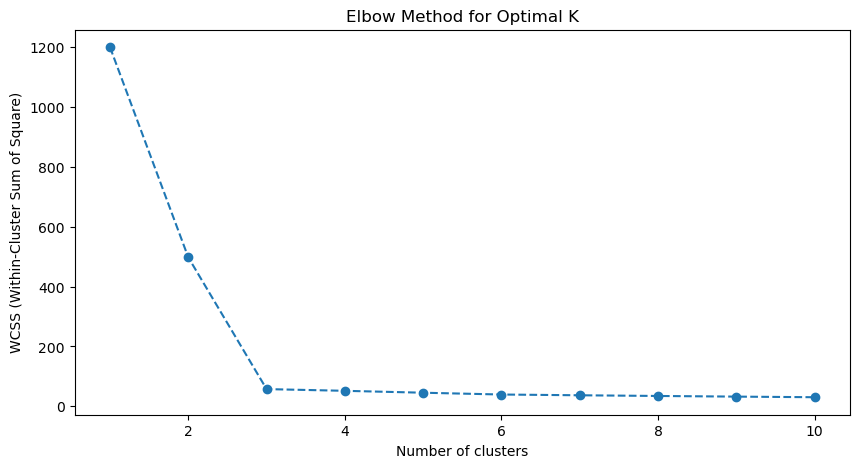

In [18]:
# 3. Determine Optimal Number of Clusters using Elbow Method
wcss = []  #within cluster sum of squre
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.show()


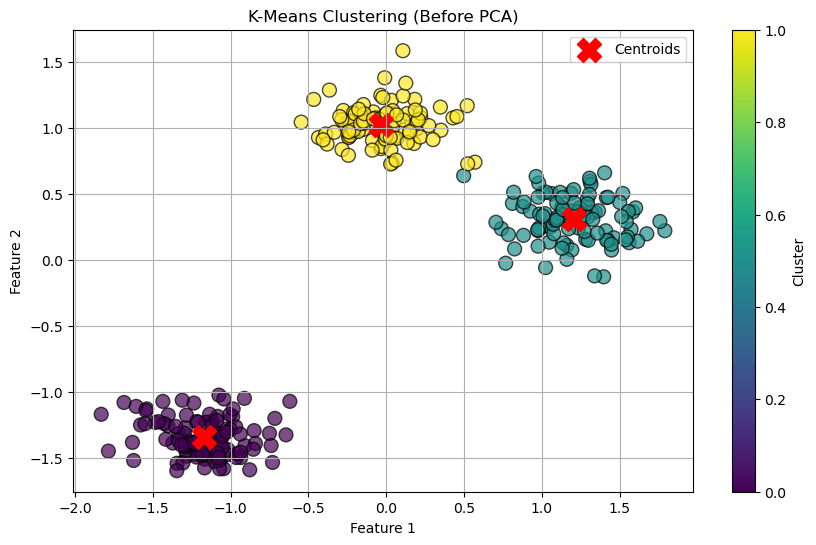

In [19]:
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Extract first two features of the original scaled dataset
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=100, alpha=0.7)

# Plot centroids before PCA
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=300, label='Centroids')

# Labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering (Before PCA)')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# 5. Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

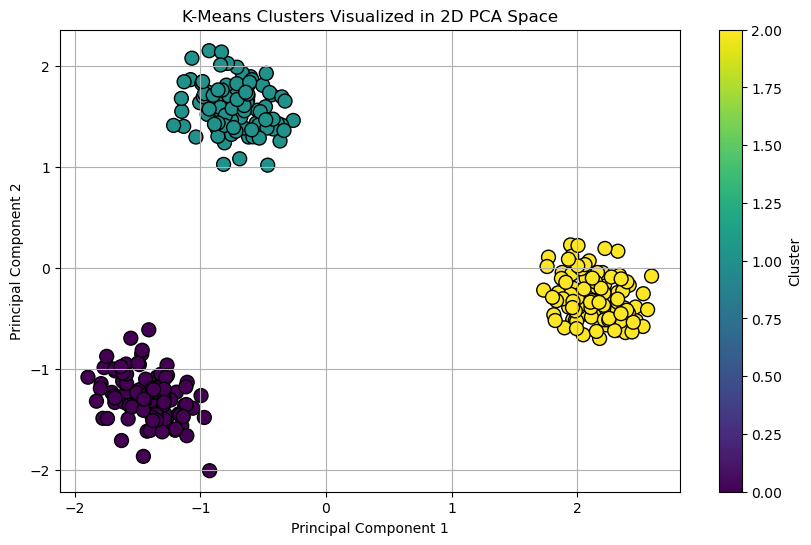

In [7]:
# 6. Visualize Clusters in PCA-reduced Space
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters Visualized in 2D PCA Space')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

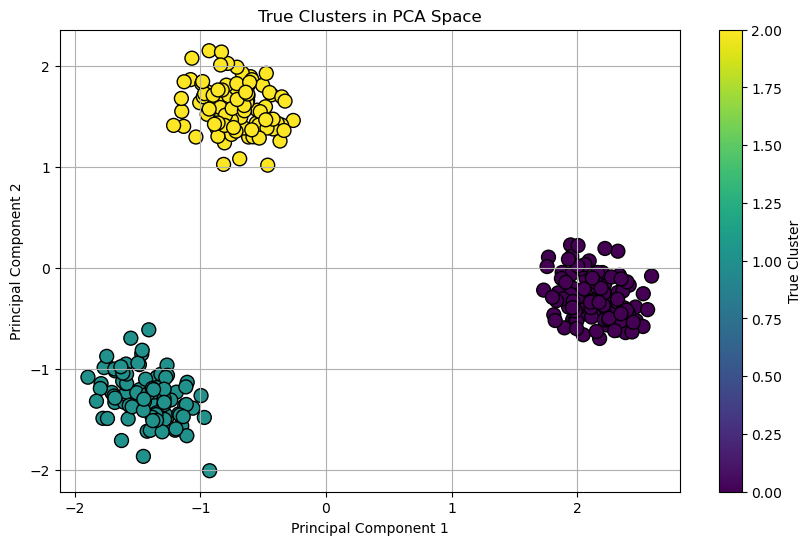

In [8]:
# (Optional) Compare with True Labels (for demonstration purposes only)
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('True Clusters in PCA Space')
plt.colorbar(label='True Cluster')
plt.grid(True)
plt.show()